#BPL : MATCH WINNERS PREDICTION
---
An Empirical Study Using Machine Learning Methodology
---
> Supervised by : Adiba Ibnat Hossain

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = 'drive/My Drive/bpl_processed.csv'
bpl = pd.read_csv(file_path)
bpl.describe()

Mounted at /content/drive


,team_1_score,team_1_wicket,team_2_score,team_2_wicket,win_by_wickets,win_by_runs
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,155.767816,6.567816,141.650575,6.011494,3.213793,15.319540
std,31.838647,2.147096,29.356261,2.960937,3.388486,24.041371
min,44.000000,0.000000,45.000000,0.000000,0.000000,0.000000
25%,135.000000,5.000000,126.000000,4.000000,0.000000,0.000000
50%,157.000000,7.000000,142.000000,6.000000,3.000000,0.000000
75%,179.000000,8.000000,161.000000,9.000000,6.000000,23.000000
max,239.000000,10.000000,222.000000,10.000000,10.000000,119.000000


In [2]:
bpl.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           435 non-null    object
 1   match_no         435 non-null    object
 2   date             435 non-null    object
 3   team_1           435 non-null    object
 4   team_1_score     435 non-null    int64 
 5   team_1_wicket    435 non-null    int64 
 6   team_2           435 non-null    object
 7   team_2_score     435 non-null    int64 
 8   team_2_wicket    435 non-null    int64 
 9   player_of_match  435 non-null    object
 10  toss_winner      435 non-null    object
 11  toss_decision    435 non-null    object
 12  winner           435 non-null    object
 13  venue            435 non-null    object
 14  city             435 non-null    object
 15  win_by_wickets   435 non-null    int64 
 16  win_by_runs      435 non-null    int64 
 17  result           435 non-null    ob

#Filter out rows where the 'winner' is 'Match'

In [3]:
bpl = bpl[bpl['winner'] != 'Match'].copy()
def replace_winner(row):
    if pd.notna(row['winner']):  # Check if the winner value is not na
        if row['winner'] in row['team_1']:
            return row['team_1']
        elif row['winner'] in row['team_2']:
            return row['team_2']
    return row['winner']
# Apply the function to the DataFrame using .loc
bpl.loc[:, 'winner'] = bpl.apply(replace_winner, axis=1)

# Display the first few rows of the DataFrame
bpl.head()

,season,match_no,date,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,2011/12,Final,Feb 29 2012,Barisal Burners,140,7,Dhaka Gladiators,144,2,Imran Nazir,Dhaka Gladiators,field first,Dhaka Gladiators,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,2011/12,2nd,Feb 28 2012,Dhaka Gladiators,191,4,Khulna Royal Bengals,182,7,Azhar Mahmood,Dhaka Gladiators,bat first,Dhaka Gladiators,SBNCS,Mirpur,0,9,9 runs,Enamul Haque,Nadir Shah
2,2011/12,1st,Feb 28 2012,Duronto Rajshahi,184,6,Barisal Burners,189,2,Ahmed Shehzad,Barisal Burners,field first,Barisal Burners,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula
3,2011/12,29th,Feb 27 2012,Dhaka Gladiators,116,10,Duronto Rajshahi,120,7,Mohammad Sami,Dhaka Gladiators,bat first,Duronto Rajshahi,SBNCS,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah
4,2011/12,28th,Feb 26 2012,Chittagong Kings,150,9,Barisal Burners,151,5,Brad Hodge,Barisal Burners,field first,Barisal Burners,SBNCS,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds


#Mapping

In [4]:
team_mapping = {
    'Comilla Victorians': 'Comilla',
    'Cumilla Warriors': 'Comilla',
    'Rangpur Riders': 'Rangpur',
    'Rangpur Rangers': 'Rangpur',
    'Dhaka Dynamites': 'Dhaka',
    'Dhaka Dominators': 'Dhaka',
    'Dhaka Gladiators': 'Dhaka',
    'Durdanto Dhaka': 'Dhaka',
    'Dhaka Platoon': 'Dhaka',
    'Minister Group Dhaka': 'Dhaka',
    'Chittagong Vikings': 'Chattogram',
    'Chittagong Kings': 'Chattogram',
    'Chattogram Challengers': 'Chattogram',
    'Barishal Bulls': 'Barishal',
    'Barisal Bulls': 'Barishal',
    'Barisal Burners': 'Barishal',
    'Fortune Barishal': 'Barishal',
    'Rajshahi Kings': 'Rajshahi',
    'Duronto Rajshahi': 'Rajshahi',
    'Rajshahi Royals': 'Rajshahi',
    'Khulna Titans': 'Khulna',
    'Khulna Royal Bengals': 'Khulna',
    'Khulna Tigers': 'Khulna',
    'Sylhet Sixers': 'Sylhet',
    'Sylhet Royals': 'Sylhet',
    'Sylhet Strikers': 'Sylhet',
    'Sylhet Sunrisers': 'Sylhet',
    'Sylhet Thunder': 'Sylhet',
    'Sylhet Super Stars': 'Sylhet'
}

# Function to replace team names
def replace_team_name(team_name):
    return team_mapping.get(team_name, team_name)

# Apply the function to 'team_1', 'team_2', and 'winner' columns
bpl['team_1'] = bpl['team_1'].apply(replace_team_name)
bpl['team_2'] = bpl['team_2'].apply(replace_team_name)
bpl['winner'] = bpl['winner'].apply(replace_team_name)
bpl['toss_winner'] = bpl['toss_winner'].apply(replace_team_name)

bpl.head()

,season,match_no,date,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,2011/12,Final,Feb 29 2012,Barishal,140,7,Dhaka,144,2,Imran Nazir,Dhaka,field first,Dhaka,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,2011/12,2nd,Feb 28 2012,Dhaka,191,4,Khulna,182,7,Azhar Mahmood,Dhaka,bat first,Dhaka,SBNCS,Mirpur,0,9,9 runs,Enamul Haque,Nadir Shah
2,2011/12,1st,Feb 28 2012,Rajshahi,184,6,Barishal,189,2,Ahmed Shehzad,Barishal,field first,Barishal,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula
3,2011/12,29th,Feb 27 2012,Dhaka,116,10,Rajshahi,120,7,Mohammad Sami,Dhaka,bat first,Rajshahi,SBNCS,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah
4,2011/12,28th,Feb 26 2012,Chattogram,150,9,Barishal,151,5,Brad Hodge,Barishal,field first,Barishal,SBNCS,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds


#Number of BPL matches won by each team

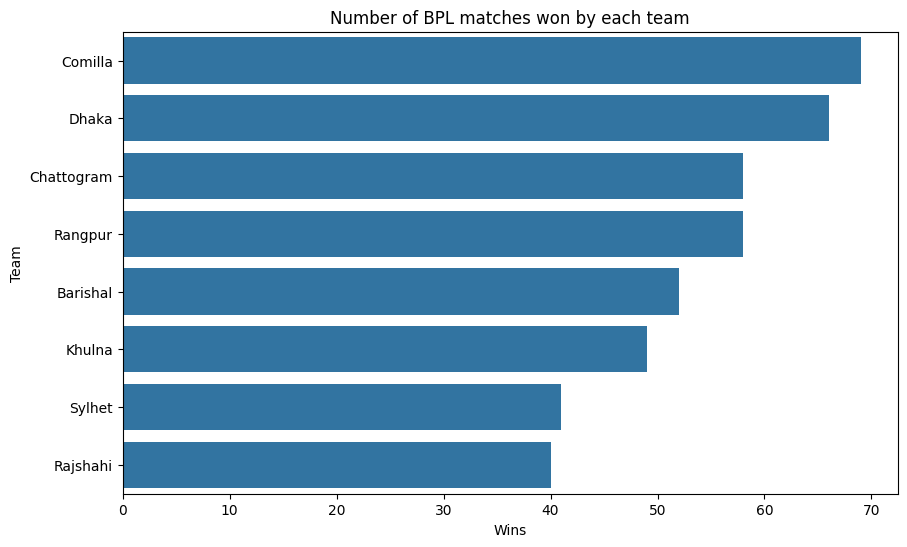

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(y='winner', data=bpl, order=bpl['winner'].value_counts().index)

# Set the labels and title
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of BPL matches won by each team')
plt.show()

#Number of BPL matches won by each team, grouped by season

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

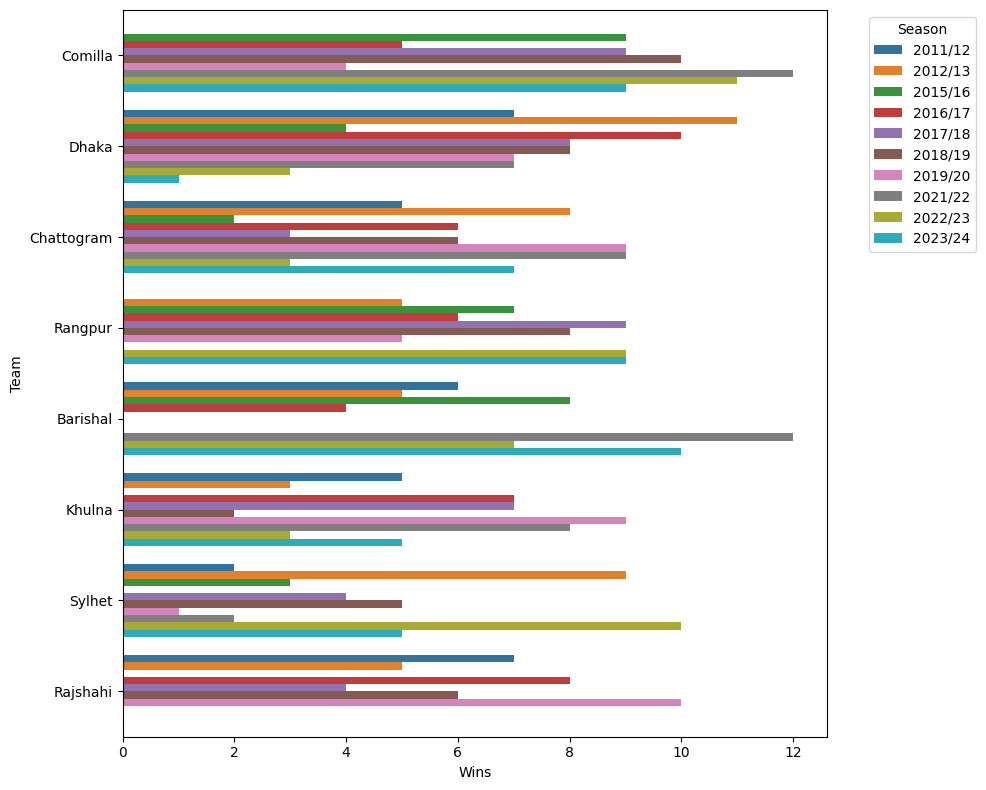

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# set figure
plt.figure(figsize=(10, 8))

# Create the count plot grouped by season
sns.countplot(y='winner', data=bpl, order=bpl['winner'].value_counts().index, hue='season')

# Set the labels and title
plt.xlabel('Wins')
plt.ylabel('Team')


# Display the plot
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Toss Decision in BPL Matches

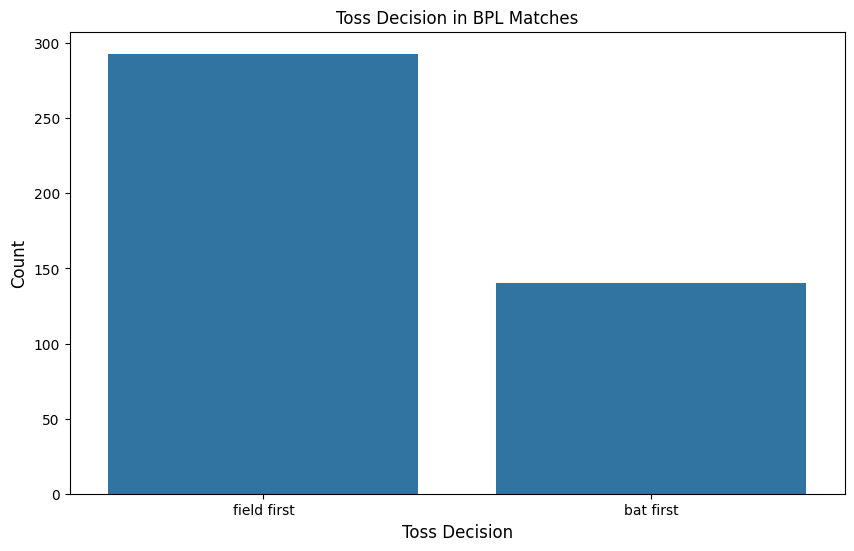

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set figure
plt.figure(figsize=(10, 6))

# Create the count plot for toss decisions
sns.countplot(x='toss_decision', data=bpl)

# Set the labels and title
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Decision in BPL Matches')

# Display the plot
plt.show()

#List of columns to analyze

In [8]:
columns_to_analyze = ['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'winner', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']
# Loop through each column and print unique values and their counts
for column in columns_to_analyze:
    print(f"------------\n{column}:\n")
    print("Unique values:")
    print(bpl[column].unique())
    print("\nValue counts:")
    print(bpl[column].value_counts())
    print("\n")


------------
season:

Unique values:
['2011/12' '2012/13' '2015/16' '2016/17' '2017/18' '2018/19' '2019/20'
 '2021/22' '2022/23' '2023/24']

Value counts:
season
2021/22    50
2012/13    46
2016/17    46
2022/23    46
2023/24    46
2018/19    45
2019/20    45
2017/18    44
2015/16    33
2011/12    32
Name: count, dtype: int64


------------
match_no:

Unique values:
['Final' '2nd' '1st' '29th' '28th' '27th' '26th' '25th' '24th' '23rd'
 'Semi-Final' '22nd' '21st' 'Elimination' '20th' 'Race' '19th' '42nd'
 '18th' '41st' '17th' '40th' '16th' '15th' '39th' '14th' '38th' '13th'
 '12th' 'Qualifier' '11th' 'Eliminator' '10th' '9th' '8th' '7th' '6th'
 '5th' '4th' '3rd' 'Eliminator,' '37th' '36th' '35th' '34th' '33rd' '32nd'
 '31st' '30th' '2nd ' '1st Qualifier' '2nd Qualifier' 'Final ' '31th'
 'Qualifier1' 'Qualifier2']

Value counts:
match_no
1st              14
2nd              13
13th             11
14th             11
10th             11
17th             11
9th              11
18th        

#Preprocessing For Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
#copy
copy_df = bpl.copy()

# Define the columns to be included in the dataframe
columns = ['season', 'match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
           'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner', 'toss_decision',
           'winner', 'venue', 'city', 'win_by_wickets', 'win_by_runs', 'result', 'umpire_1', 'umpire_2']

# Create the dataframe with the specified columns
dataframe = pd.DataFrame(copy_df, columns=columns)

# Function to extract the year from the season and convert to integer
def extract_year(season):
    return int(season.split('/')[1])

# Apply the function to the 'season' column
dataframe['season'] = dataframe['season'].apply(extract_year)


# Ensure the 'season' column is integer type
dataframe['season'] = dataframe['season'].astype(int)
df = dataframe.copy()
df.to_csv('minhaj.csv', index=False)
dataframe.tail(30)

,season,match_no,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
405,24,17th,Sylhet,142,8,Dhaka,127,9,Richard Ngarava,Dhaka,field first,Sylhet,SylhetICS,Sylhet,0,15,15 runs,Ali Arman,Asif Yaqoob
406,24,18th,Chattogram,72,10,Comilla,73,3,Tanvir Islam,Comilla,field first,Comilla,SylhetICS,Sylhet,7,0,7 wickets,David Millns,Tanvir Ahmed
407,24,19th,Khulna,155,8,Barishal,156,5,Shoaib Malik,Barishal,field first,Barishal,SylhetICS,Sylhet,5,0,5 wickets,David Millns,Morshed Ali Khan
408,24,20th,Rangpur,162,7,Sylhet,85,10,Nurul Hasan,Sylhet,field first,Rangpur,SylhetICS,Sylhet,0,77,77 runs,Asif Yaqoob,Moniruzzaman
409,24,21st,Rangpur,175,4,Dhaka,115,10,Shakib Al Hasan,Dhaka,field first,Rangpur,SBNCS,Mirpur,0,60,60 runs,Asif Yaqoob,Mahfuzur Rahman
410,24,22nd,Chattogram,145,5,Barishal,129,8,Shohidul Islam,Barishal,field first,Chattogram,SBNCS,Mirpur,0,16,16 runs,David Millns,Morshed Ali Khan
411,24,23rd,Comilla,149,7,Khulna,115,10,Aamer Jamal,Comilla,bat first,Comilla,SBNCS,Mirpur,0,34,34 runs,David Millns,Moniruzzaman
412,24,24th,Dhaka,124,8,Sylhet,129,5,Benny Howell,Sylhet,field first,Sylhet,SBNCS,Mirpur,5,0,5 wickets,Mahfuzur Rahman,Tanvir Ahmed
413,24,25th,Khulna,153,3,Sylhet,159,5,Harry Tector,Khulna,bat first,Sylhet,SBNCS,Mirpur,5,0,5 wickets,Asif Yaqoob,Mahfuzur Rahman
414,24,26th,Dhaka,175,4,Comilla,176,6,Towhid Hridoy,Dhaka,bat first,Comilla,SBNCS,Mirpur,4,0,4 wickets,David Millns,Tanvir Ahmed


#DataType Check and Show Cloumn after Label Encoding

In [10]:
le = LabelEncoder()
for col in columns:
    dataframe[col] = le.fit_transform(dataframe[col])
print(dataframe.dtypes)
dataframe.tail(20)

season             int64
match_no           int64
team_1             int64
team_1_score       int64
team_1_wicket      int64
team_2             int64
team_2_score       int64
team_2_wicket      int64
player_of_match    int64
toss_winner        int64
toss_decision      int64
winner             int64
venue              int64
city               int64
win_by_wickets     int64
win_by_runs        int64
result             int64
umpire_1           int64
umpire_2           int64
dtype: object


,season,match_no,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
415,9,19,6,119,3,1,79,6,60,6,0,6,2,2,0,47,54,7,16
416,9,20,0,101,4,3,70,10,153,0,0,0,2,2,0,38,42,10,11
417,9,21,2,129,3,1,87,10,168,1,1,2,4,0,0,64,75,13,13
418,9,25,6,124,5,4,62,10,56,6,0,6,4,0,0,68,79,10,11
419,9,27,0,98,6,3,80,8,156,0,0,0,4,0,0,26,26,10,5
420,9,28,4,76,8,2,89,3,163,4,0,2,4,0,7,0,71,13,36
421,9,29,3,40,7,4,52,5,167,3,0,4,4,0,5,0,51,10,12
422,9,30,6,99,8,1,90,6,75,6,0,6,4,0,0,18,16,13,5
423,9,31,0,95,6,7,86,8,70,0,0,0,4,0,0,18,16,13,36
424,9,32,1,71,6,3,70,5,158,1,0,1,4,0,0,10,4,10,11


#Apply DecisionTree Model Train & Test

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming the dataframe has been preprocessed as described before
# Replace 'dataframe' with your preprocessed DataFrame if needed

# Define the feature matrix and target vector
X = dataframe[['season', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9425287356321839
Confusion Matrix:
[[11  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0]
 [ 0  0 15  0  0  0  1  0]
 [ 0  0  0 11  0  1  0  0]
 [ 0  0  0  0  9  1  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 1  0  0  0  0  0  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.97        15
           2       0.94      0.94      0.94        16
           3       1.00      0.92      0.96        12
           4       1.00      0.90      0.95        10
           5       0.75      1.00      0.86         6
           6       0.90      1.00      0.95         9
           7       1.00      0.88      0.93         8

    accuracy                           0.94        87
   macro avg       0.94      0.95      0.94        87
weighted avg       0.95      0.94      0.94        87



#Apply XG Boosting Classifier Model Train & Test

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Prepare the features (X) and the target variable (y)
X = dataframe[['season', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
        'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize the XGBoost model
model = XGBClassifier(eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9770114942528736
Confusion Matrix:
[[ 9  0  0  0  0  0  0  1]
 [ 0 10  0  0  0  0  0  0]
 [ 1  0 14  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0]
 [ 0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00        10
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       0.89      1.00      0.94         8

    accuracy                           0.98        87
   macro avg       0.97      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



#Apply Gradient Boosting Classifier Model Train & Test

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Prepare the features (X) and the target variable (y)
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
        'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9772727272727273
Confusion Matrix:
[[3 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0]
 [0 0 0 9 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 3 0 0]
 [1 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.88      0.93         8
           7       1.00      1.00      1.00         6

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



#Apply Random Forest Classifier Model Train & Test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Prepare the features (X) and the target variable (y)
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.896551724137931
Confusion Matrix:
[[ 7  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 0  0  3 15  0  0  0  0]
 [ 0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  6  1  0]
 [ 1  0  0  0  0  1 12  0]
 [ 0  0  0  0  1  0  2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00        10
           2       0.82      1.00      0.90        14
           3       1.00      0.83      0.91        18
           4       0.86      1.00      0.92         6
           5       0.86      0.86      0.86         7
           6       0.80      0.86      0.83        14
           7       1.00      0.73      0.84        11

    accuracy                           0.90        87
   macro avg       0.90      0.91      0.90        87
weighted avg       0.91      0.90      0.90        87



#*Manual Testing*

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming `bpl` is your dataset with the necessary label encoding applied

# Prepare the features (X) and the target variable (y)
X = df[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket',  'toss_winner',
       'toss_decision', 'venue', 'city','umpire_1','umpire_2']]
y = df['winner']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

# Initialize the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Function to input match details and predict the winner
def predict_winner_xgb():
    season = input("Enter Season: ")
    team_1 = input("Enter Team 1: ")
    team_1_score = int(input("Enter Team 1's Score: "))
    team_1_wicket = int(input("Enter Team 1's Wickets: "))
    team_2 = input("Enter Team 2: ")
    toss_winner = input("Enter Toss Winner: ")
    toss_decision = input("Enter Toss Decision (bat/field): ")
    city = input("Enter City: ")
    venue = input("Enter Venue: ")
    umpire_1 = input("Enter Umpire 1: ")
    umpire_2 = input("Enter Umpire 2: ")

    # Prepare the input data
    input_data = {
        'season': [season],
        'team_1': [team_1],
        'team_1_score': [team_1_score],
        'team_1_wicket': [team_1_wicket],
        'team_2': [team_2],
        'toss_winner': [toss_winner],
        'toss_decision': [toss_decision],
        'city': [city],
        'venue': [venue],
        'umpire_1': [umpire_1],
        'umpire_2': [umpire_2]
    }

    input_df = pd.DataFrame(input_data)
    input_df = pd.get_dummies(input_df)

    # Align the input data with the training data columns
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Predict the winner
    predicted_winner_encoded = model.predict(input_df)
    predicted_winner = label_encoder.inverse_transform(predicted_winner_encoded)
    print(f"Predicted Winner: {predicted_winner[0]}")

# Call the function to input values and predict the winner
predict_winner_xgb()


Enter Season: 12
Enter Team 1: Sylhet	
Enter Team 1's Score: 120
Enter Team 1's Wickets: 7
Enter Team 2: Barishal
Enter Toss Winner: Sylhet
Enter Toss Decision (bat/field): bat
Enter City: Chattogram
Enter Venue: ZACS
Enter Umpire 1: Enamul Haque
Enter Umpire 2: Jeremy Lloyds
Predicted Winner: Barishal
